Using Excel file: C:\Users\LBKY\Desktop\10_Optimus_Model_Final.xlsx
OPTIMUS PROJECT - ENTERPRISE VALUE ANALYSIS

Loading Excel file: C:\Users\LBKY\Desktop\10_Optimus_Model_Final.xlsx

Available sheets (14 total):
   1. Control Panel
   2. D&A details
   3. Accounting Depreciation
   4. gen 1 Cost curve
   5. gen 2 Cost Curve
   6. gen 1 Selling Price
   7. gen 2 Selling Price
   8. Deferred Income Tax Calculation
   9. Software business
  10. Scenario Analysis Brief
  11. Beta Sensitivity Matrix
  12. EV_Normal
  13. EV_Optimistic
  14. EV_Conservative

Target sheets (last six):
  1. Software business
  2. Scenario Analysis Brief
  3. Beta Sensitivity Matrix
  4. EV_Normal
  5. EV_Optimistic
  6. EV_Conservative

Processing: Software business

Processing: Scenario Analysis Brief

Cleaning Scenario Analysis Brief sheet...
Shape: (9, 4)
First few rows:
   Beta (β) Market Scenario  Project NPV (Million USD)  \
0       0.1          Normal               25247.524167   
1       0.1      Opti

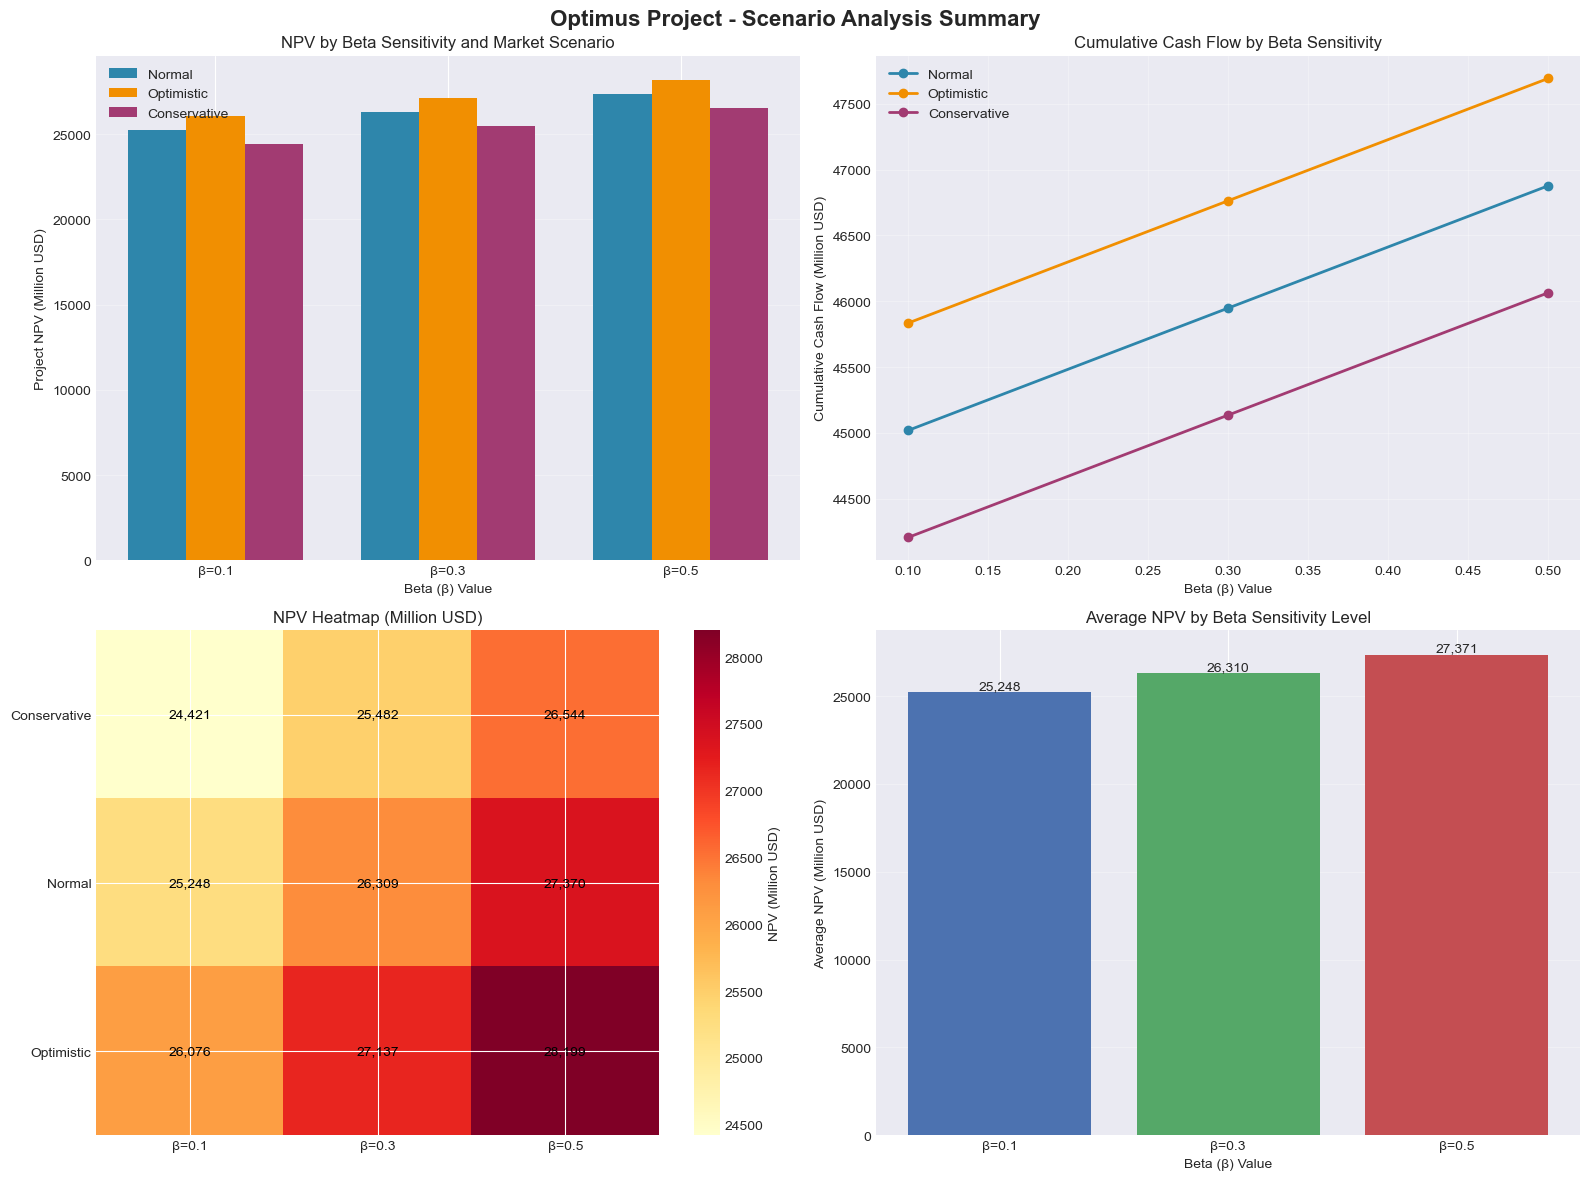


SCENARIO ANALYSIS SUMMARY STATISTICS
                Project NPV (Million USD)                               \
                                     mean       min       max      std   
Market Scenario                                                          
Conservative                     25482.40  24421.16  26543.64  1061.24   
Normal                           26308.76  25247.52  27370.00  1061.24   
Optimistic                       27137.48  26076.23  28198.72  1061.24   

                Cumulative Cash Flow (M)                      
                                    mean       min       max  
Market Scenario                                               
Conservative                    45135.96  44207.96  46063.96  
Normal                          45948.30  45020.30  46876.30  
Optimistic                      46763.31  45835.31  47691.31  


NPV Sensitivity to Beta Changes:
--------------------------------------------------
Scenario        β=0.1           β=0.3           β=0.5

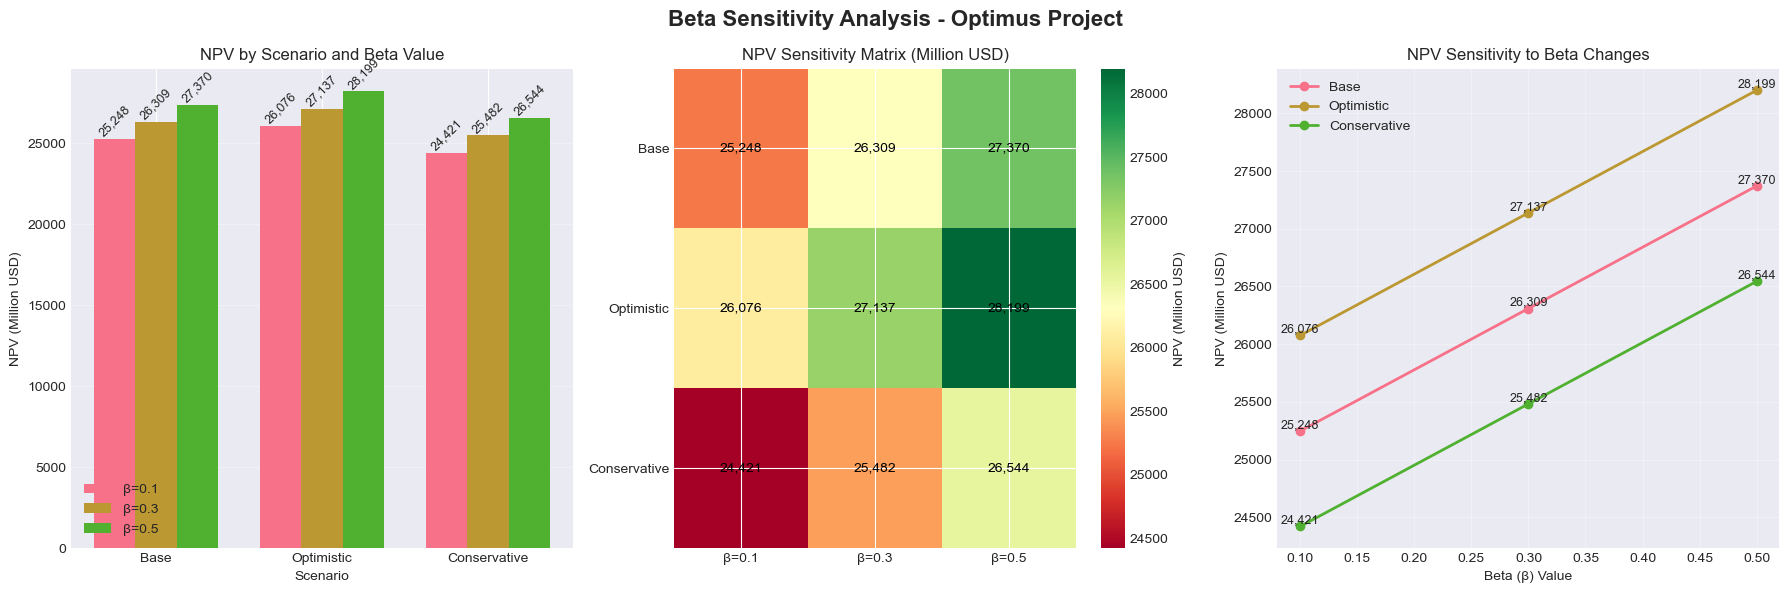


BETA SENSITIVITY DETAILED ANALYSIS

Scenarios: ['Base', 'Optimistic', 'Conservative']
Beta values analyzed: [0.1, 0.3, 0.5]

NPV Values by Scenario and Beta:
------------------------------------------------------------
Scenario        β=0.1           β=0.3           β=0.5          
------------------------------------------------------------
Base            25,248          26,309          27,370         
Optimistic      26,076          27,137          28,199         
Conservative    24,421          25,482          26,544         

Sensitivity Analysis (Change from β=0.1 to β=0.5):
--------------------------------------------------
Scenario        β=0.1           β=0.5           Δ NPV           % Change       
--------------------------------------------------
Base            25,248<15 27,370<15 2,122<15 8.4%
Optimistic      26,076<15 28,199<15 2,122<15 8.1%
Conservative    24,421<15 26,544<15 2,122<15 8.7%

Creating Enterprise Value Analysis visualizations...


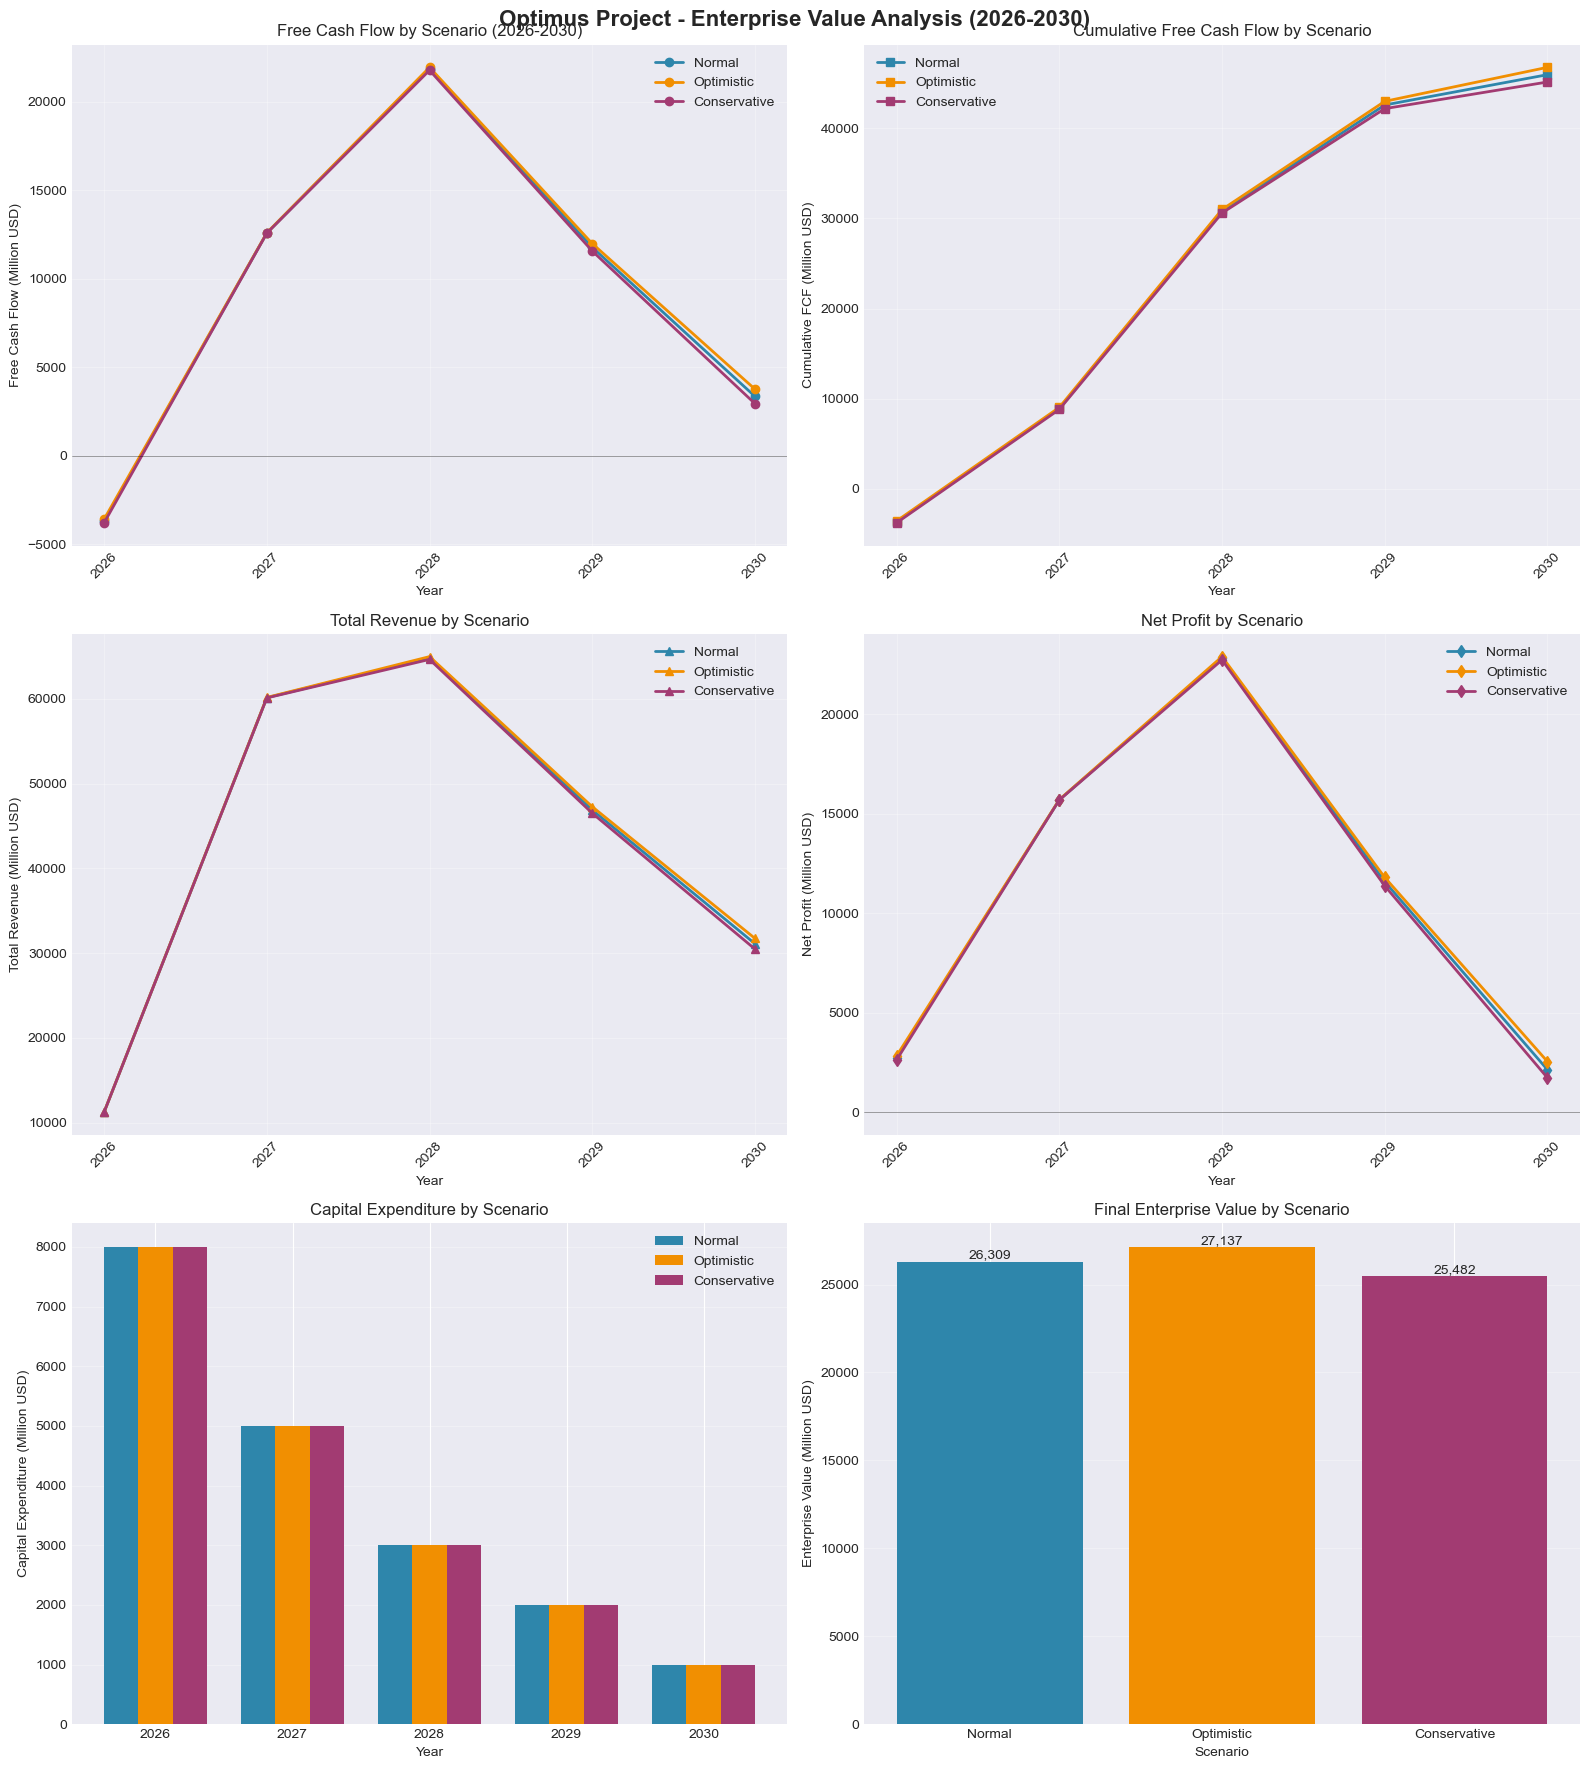


ENTERPRISE VALUE ANALYSIS SUMMARY

Key Performance Indicators by Scenario:
    Scenario  Total Revenue (M)  Total FCF (M)  Avg Net Profit (M)  Total Capex (M)  Final EV (M)  FCF/Capex Ratio
      Normal            214,208         45,948              10,986            19000        26,309                2
  Optimistic            215,422         46,763              11,149            19000        27,137                2
Conservative            213,004         45,136              10,824            19000        25,482                2


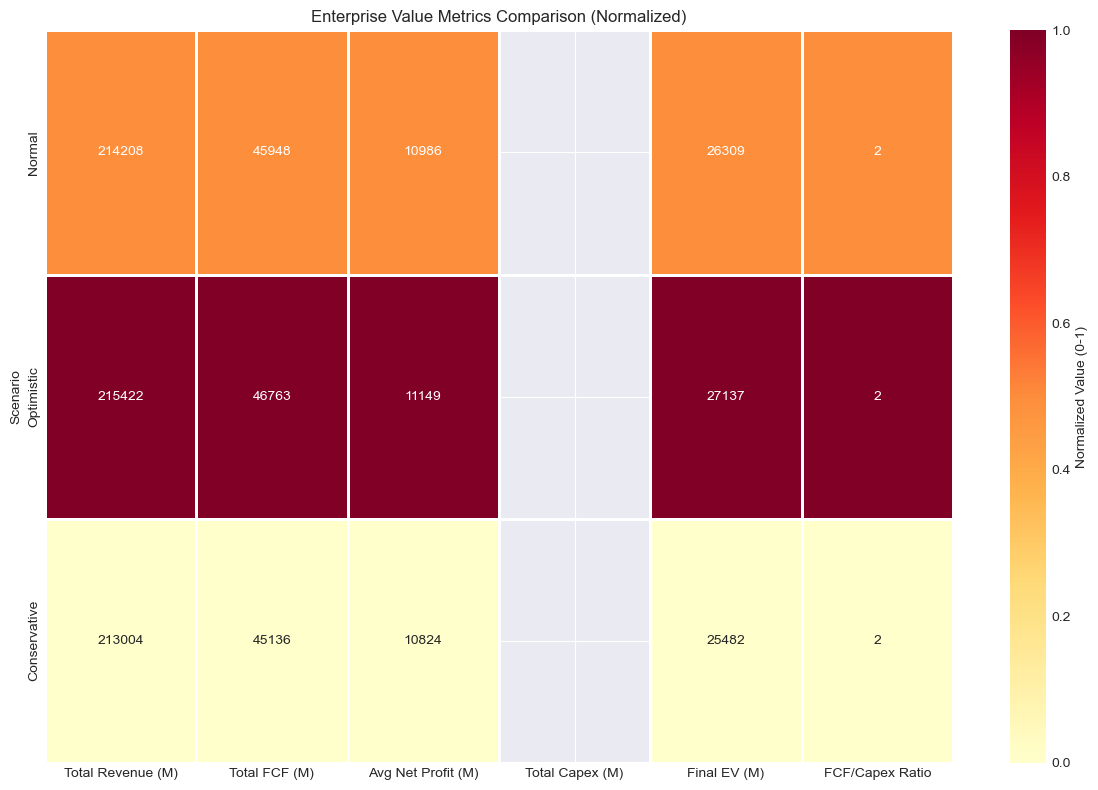


YEAR-BY-YEAR ANALYSIS (Normal Scenario)

Normal Scenario Financial Performance:
----------------------------------------------------------------------------------------------------
Year       Revenue (M)     Gross Profit (M)     Net Profit (M)  FCF (M)         Capex (M)      
----------------------------------------------------------------------------------------------------
2026       11250           7875                 2725            -3675           8000           
2027       60137           46116                15691           12596           5000           
2028       64817           47094                22804           21874           3000           
2029       46892           27960                11580           11788           2000           
2030       31113           11206                2131            3366            1000           

ANALYSIS COMPLETED SUCCESSFULLY!

Generated visualizations:
1. scenario_analysis_brief.png - Scenario analysis summary
2. beta_sensitivity_m

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import re
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Define relative paths
data_dir = Path("C:/Users/LBKY/Desktop")
excel_file = data_dir / "10_Optimus_Model_Final.xlsx"

# Alternative paths if file not found
alternative_paths = [
    Path("./10_Optimus_Model_Final.xlsx"),
    Path("../10_Optimus_Model_Final.xlsx"),
    Path("data/10_Optimus_Model_Final.xlsx"),
    Path("../data/10_Optimus_Model_Final.xlsx")
]

# Check if file exists
if not excel_file.exists():
    for alt_path in alternative_paths:
        if alt_path.exists():
            excel_file = alt_path
            print(f"Found Excel file at alternative path: {excel_file}")
            break
    else:
        print(f"Error: Excel file not found at {excel_file}")
        print("Current working directory:", Path.cwd())
        print("\nPlease ensure the file exists in one of these locations:")
        for path in [data_dir] + alternative_paths:
            print(f"  - {path}")
        exit()

print(f"Using Excel file: {excel_file}")

def clean_scenario_analysis_brief(df):
    """Clean Scenario Analysis Brief sheet"""
    print("\n" + "="*60)
    print("Cleaning Scenario Analysis Brief sheet...")
    print("="*60)
    
    # Basic cleaning
    df_clean = df.copy()
    df_clean = df_clean.dropna(how='all', axis=0)
    df_clean = df_clean.dropna(how='all', axis=1)
    
    # Reset index
    df_clean = df_clean.reset_index(drop=True)
    
    # Set column names
    if df_clean.shape[0] > 0:
        df_clean.columns = df_clean.iloc[0]
        df_clean = df_clean[1:].reset_index(drop=True)
    
    # Clean column names
    df_clean.columns = [str(col).strip() for col in df_clean.columns]
    
    # Convert numeric columns
    numeric_cols = ['Beta (β)', 'Project NPV (Million USD)', 'Cumulative Cash Flow (M)']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    print(f"Shape: {df_clean.shape}")
    print("First few rows:")
    print(df_clean.head())
    
    return df_clean

def clean_beta_sensitivity_matrix(df):
    """Clean Beta Sensitivity Matrix sheet"""
    print("\n" + "="*60)
    print("Cleaning Beta Sensitivity Matrix sheet...")
    print("="*60)
    
    # Basic cleaning
    df_clean = df.copy()
    df_clean = df_clean.dropna(how='all', axis=0)
    df_clean = df_clean.dropna(how='all', axis=1)
    
    # Reset index
    df_clean = df_clean.reset_index(drop=True)
    
    # Set column names (first row)
    if df_clean.shape[0] > 0:
        df_clean.columns = df_clean.iloc[0]
        df_clean = df_clean[1:].reset_index(drop=True)
    
    # Clean column names
    df_clean.columns = [str(col).strip() for col in df_clean.columns]
    
    # Rename first column
    if df_clean.shape[1] > 0:
        df_clean.rename(columns={df_clean.columns[0]: 'Scenario'}, inplace=True)
    
    # Convert numeric columns
    for col in df_clean.columns[1:]:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    print(f"Shape: {df_clean.shape}")
    print("Data:")
    print(df_clean)
    
    return df_clean

def clean_enterprise_value_sheet(df, scenario_name):
    """Clean Enterprise Value sheet (EV_Normal, EV_Optimistic, EV_Conservative)"""
    print(f"\nCleaning {scenario_name} sheet...")
    
    # Basic cleaning
    df_clean = df.copy()
    df_clean = df_clean.dropna(how='all', axis=0)
    df_clean = df_clean.dropna(how='all', axis=1)
    
    # Reset index
    df_clean = df_clean.reset_index(drop=True)
    
    # Set column names (first row)
    if df_clean.shape[0] > 0:
        df_clean.columns = df_clean.iloc[0]
        df_clean = df_clean[1:].reset_index(drop=True)
    
    # Clean column names
    df_clean.columns = [str(col).strip() for col in df_clean.columns]
    
    # Convert Year to string
    if 'Year' in df_clean.columns:
        df_clean['Year'] = df_clean['Year'].astype(str)
    
    # Convert numeric columns
    numeric_cols = ['Total Sales', 'Total Revenue', 'Total Gross Profit', 
                   'Operating Expense', 'Depreciation', 'Operating Profit',
                   'Current Tax', 'Net Profit', 'Capital Expenditure', 
                   'Free Cash Flow', 'Discount Factor', 'NPV']
    
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Add scenario name
    df_clean['Scenario'] = scenario_name
    
    print(f"Shape: {df_clean.shape}")
    print(f"Columns: {list(df_clean.columns)}")
    
    return df_clean

def visualize_scenario_analysis_brief(df):
    """Create visualizations for Scenario Analysis Brief"""
    print("\n" + "="*60)
    print("Creating Scenario Analysis Brief visualizations...")
    print("="*60)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Optimus Project - Scenario Analysis Summary', fontsize=16, fontweight='bold')
    
    # 1. NPV by Beta and Scenario
    ax1 = axes[0, 0]
    
    # Group data
    scenarios = df['Market Scenario'].unique()
    beta_values = sorted(df['Beta (β)'].unique())
    
    x = np.arange(len(beta_values))
    width = 0.25
    
    colors = {'Normal': '#2E86AB', 'Optimistic': '#F18F01', 'Conservative': '#A23B72'}
    
    for i, scenario in enumerate(scenarios):
        scenario_data = df[df['Market Scenario'] == scenario]
        scenario_npv = []
        
        for beta in beta_values:
            beta_data = scenario_data[scenario_data['Beta (β)'] == beta]
            if not beta_data.empty:
                scenario_npv.append(beta_data['Project NPV (Million USD)'].values[0])
            else:
                scenario_npv.append(0)
        
        ax1.bar(x + (i - 1) * width, scenario_npv, width, 
                label=scenario, color=colors.get(scenario, '#999999'))
    
    ax1.set_xlabel('Beta (β) Value')
    ax1.set_ylabel('Project NPV (Million USD)')
    ax1.set_title('NPV by Beta Sensitivity and Market Scenario')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'β={beta}' for beta in beta_values])
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. Cumulative Cash Flow by Scenario
    ax2 = axes[0, 1]
    
    for scenario in scenarios:
        scenario_data = df[df['Market Scenario'] == scenario]
        ax2.plot(scenario_data['Beta (β)'], scenario_data['Cumulative Cash Flow (M)'], 
                marker='o', linewidth=2, label=scenario, color=colors.get(scenario, '#999999'))
    
    ax2.set_xlabel('Beta (β) Value')
    ax2.set_ylabel('Cumulative Cash Flow (Million USD)')
    ax2.set_title('Cumulative Cash Flow by Beta Sensitivity')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Heatmap of NPV values
    ax3 = axes[1, 0]
    
    # Create pivot table for heatmap
    pivot_df = df.pivot(index='Market Scenario', columns='Beta (β)', values='Project NPV (Million USD)')
    
    im = ax3.imshow(pivot_df.values, cmap='YlOrRd', aspect='auto')
    
    ax3.set_xticks(np.arange(len(pivot_df.columns)))
    ax3.set_yticks(np.arange(len(pivot_df.index)))
    ax3.set_xticklabels([f'β={col}' for col in pivot_df.columns])
    ax3.set_yticklabels(pivot_df.index)
    
    # Add text annotations
    for i in range(len(pivot_df.index)):
        for j in range(len(pivot_df.columns)):
            text = ax3.text(j, i, f'{pivot_df.iloc[i, j]:,.0f}',
                          ha="center", va="center", color="black", fontsize=10)
    
    ax3.set_title('NPV Heatmap (Million USD)')
    plt.colorbar(im, ax=ax3, label='NPV (Million USD)')
    
    # 4. Beta Sensitivity Impact
    ax4 = axes[1, 1]
    
    beta_impact = []
    for beta in beta_values:
        beta_data = df[df['Beta (β)'] == beta]
        avg_npv = beta_data['Project NPV (Million USD)'].mean()
        beta_impact.append(avg_npv)
    
    bars = ax4.bar([f'β={beta}' for beta in beta_values], beta_impact, 
                   color=['#4C72B0', '#55A868', '#C44E52'])
    
    ax4.set_xlabel('Beta (β) Value')
    ax4.set_ylabel('Average NPV (Million USD)')
    ax4.set_title('Average NPV by Beta Sensitivity Level')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('scenario_analysis_brief.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*60)
    print("SCENARIO ANALYSIS SUMMARY STATISTICS")
    print("="*60)
    
    summary_stats = df.groupby('Market Scenario').agg({
        'Project NPV (Million USD)': ['mean', 'min', 'max', 'std'],
        'Cumulative Cash Flow (M)': ['mean', 'min', 'max']
    }).round(2)
    
    print(summary_stats)
    
    # Additional: Sensitivity analysis table
    print("\n\nNPV Sensitivity to Beta Changes:")
    print("-" * 50)
    print(f"{'Scenario':<15} {'β=0.1':<15} {'β=0.3':<15} {'β=0.5':<15} {'Δ (0.1 to 0.5)':<15}")
    print("-" * 50)
    
    for scenario in scenarios:
        scenario_data = df[df['Market Scenario'] == scenario]
        
        npv_01 = scenario_data[scenario_data['Beta (β)'] == 0.1]['Project NPV (Million USD)'].values[0]
        npv_03 = scenario_data[scenario_data['Beta (β)'] == 0.3]['Project NPV (Million USD)'].values[0]
        npv_05 = scenario_data[scenario_data['Beta (β)'] == 0.5]['Project NPV (Million USD)'].values[0]
        
        delta = npv_05 - npv_01
        percent_change = (delta / npv_01 * 100)
        
        print(f"{scenario:<15} {npv_01:,.0f}<15 {npv_03:,.0f}<15 {npv_05:,.0f}<15 {delta:,.0f} ({percent_change:.1f}%)")

def visualize_beta_sensitivity_matrix(df):
    """Create visualizations for Beta Sensitivity Matrix"""
    print("\n" + "="*60)
    print("Creating Beta Sensitivity Matrix visualizations...")
    print("="*60)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Beta Sensitivity Analysis - Optimus Project', fontsize=16, fontweight='bold')
    
    # Ensure we have the expected structure
    if df.shape[0] < 3 or df.shape[1] < 4:
        print("Warning: Beta Sensitivity Matrix has unexpected structure")
        print(f"Shape: {df.shape}")
        print(df)
        return
    
    # Extract beta values from column names
    beta_columns = [col for col in df.columns if 'β=' in str(col)]
    if not beta_columns:
        beta_columns = list(df.columns[1:])  # Use all columns except first
    
    beta_values = [float(col.replace('β=', '')) for col in beta_columns]
    
    # 1. Bar chart comparison
    ax1 = axes[0]
    
    x = np.arange(len(df))
    width = 0.25
    
    for i, (col, beta) in enumerate(zip(beta_columns, beta_values)):
        values = df[col].values
        ax1.bar(x + (i - 1) * width, values, width, label=f'β={beta}')
    
    ax1.set_xlabel('Scenario')
    ax1.set_ylabel('NPV (Million USD)')
    ax1.set_title('NPV by Scenario and Beta Value')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df.iloc[:, 0].values)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, (idx, row) in enumerate(df.iterrows()):
        for j, col in enumerate(beta_columns):
            height = row[col]
            ax1.text(i + (j - 1) * width, height, f'{height:,.0f}', 
                    ha='center', va='bottom', fontsize=9, rotation=45)
    
    # 2. Heatmap visualization
    ax2 = axes[1]
    
    # Create data for heatmap
    heatmap_data = df[beta_columns].values
    
    im = ax2.imshow(heatmap_data, cmap='RdYlGn', aspect='auto')
    
    ax2.set_xticks(np.arange(len(beta_columns)))
    ax2.set_yticks(np.arange(len(df)))
    ax2.set_xticklabels([f'β={beta}' for beta in beta_values])
    ax2.set_yticklabels(df.iloc[:, 0].values)
    
    # Add text annotations
    for i in range(len(df)):
        for j in range(len(beta_columns)):
            text = ax2.text(j, i, f'{heatmap_data[i, j]:,.0f}',
                          ha="center", va="center", color="black", fontsize=10)
    
    ax2.set_title('NPV Sensitivity Matrix (Million USD)')
    plt.colorbar(im, ax=ax2, label='NPV (Million USD)')
    
    # 3. Line chart showing sensitivity
    ax3 = axes[2]
    
    for i, scenario in enumerate(df.iloc[:, 0].values):
        scenario_values = df[beta_columns].iloc[i].values
        ax3.plot(beta_values, scenario_values, marker='o', linewidth=2, label=scenario)
    
    ax3.set_xlabel('Beta (β) Value')
    ax3.set_ylabel('NPV (Million USD)')
    ax3.set_title('NPV Sensitivity to Beta Changes')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for i, scenario in enumerate(df.iloc[:, 0].values):
        scenario_values = df[beta_columns].iloc[i].values
        for j, (beta, value) in enumerate(zip(beta_values, scenario_values)):
            ax3.text(beta, value, f'{value:,.0f}', 
                    ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('beta_sensitivity_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print detailed analysis
    print("\n" + "="*60)
    print("BETA SENSITIVITY DETAILED ANALYSIS")
    print("="*60)
    
    print(f"\nScenarios: {list(df.iloc[:, 0].values)}")
    print(f"Beta values analyzed: {beta_values}")
    
    print("\nNPV Values by Scenario and Beta:")
    print("-" * 60)
    header = f"{'Scenario':<15} " + " ".join([f"{f'β={beta}':<15}" for beta in beta_values])
    print(header)
    print("-" * 60)
    
    for i, scenario in enumerate(df.iloc[:, 0].values):
        row_values = [f"{df[beta_columns[j]].iloc[i]:,.0f}" for j in range(len(beta_columns))]
        row_str = f"{scenario:<15} " + " ".join([f"{val:<15}" for val in row_values])
        print(row_str)
    
    print("\nSensitivity Analysis (Change from β=0.1 to β=0.5):")
    print("-" * 50)
    print(f"{'Scenario':<15} {'β=0.1':<15} {'β=0.5':<15} {'Δ NPV':<15} {'% Change':<15}")
    print("-" * 50)
    
    for i, scenario in enumerate(df.iloc[:, 0].values):
        npv_01 = df[beta_columns[0]].iloc[i]
        npv_05 = df[beta_columns[-1]].iloc[i] if len(beta_columns) > 1 else npv_01
        
        delta = npv_05 - npv_01
        percent_change = (delta / npv_01 * 100) if npv_01 != 0 else 0
        
        print(f"{scenario:<15} {npv_01:,.0f}<15 {npv_05:,.0f}<15 {delta:,.0f}<15 {percent_change:.1f}%")

def visualize_enterprise_value_sheets(ev_data_dict):
    """Create visualizations for Enterprise Value sheets"""
    print("\n" + "="*60)
    print("Creating Enterprise Value Analysis visualizations...")
    print("="*60)
    
    # Combine all scenario data
    all_data = pd.concat(ev_data_dict.values(), ignore_index=True)
    
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle('Optimus Project - Enterprise Value Analysis (2026-2030)', fontsize=16, fontweight='bold')
    
    colors = {'EV_Normal': '#2E86AB', 'EV_Optimistic': '#F18F01', 'EV_Conservative': '#A23B72'}
    
    # 1. Free Cash Flow Comparison
    ax1 = axes[0, 0]
    
    for scenario_name, color in colors.items():
        if scenario_name in ev_data_dict:
            scenario_data = ev_data_dict[scenario_name]
            ax1.plot(scenario_data['Year'], scenario_data['Free Cash Flow'], 
                    marker='o', linewidth=2, label=scenario_name.replace('EV_', ''), color=color)
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Free Cash Flow (Million USD)')
    ax1.set_title('Free Cash Flow by Scenario (2026-2030)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Add zero line
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # 2. Cumulative Free Cash Flow
    ax2 = axes[0, 1]
    
    for scenario_name, color in colors.items():
        if scenario_name in ev_data_dict:
            scenario_data = ev_data_dict[scenario_name]
            cumulative_fcf = np.cumsum(scenario_data['Free Cash Flow'].fillna(0))
            ax2.plot(scenario_data['Year'], cumulative_fcf, 
                    marker='s', linewidth=2, label=scenario_name.replace('EV_', ''), color=color)
    
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Cumulative FCF (Million USD)')
    ax2.set_title('Cumulative Free Cash Flow by Scenario')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Revenue Comparison
    ax3 = axes[1, 0]
    
    for scenario_name, color in colors.items():
        if scenario_name in ev_data_dict:
            scenario_data = ev_data_dict[scenario_name]
            ax3.plot(scenario_data['Year'], scenario_data['Total Revenue'], 
                    marker='^', linewidth=2, label=scenario_name.replace('EV_', ''), color=color)
    
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Total Revenue (Million USD)')
    ax3.set_title('Total Revenue by Scenario')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Net Profit Comparison
    ax4 = axes[1, 1]
    
    for scenario_name, color in colors.items():
        if scenario_name in ev_data_dict:
            scenario_data = ev_data_dict[scenario_name]
            ax4.plot(scenario_data['Year'], scenario_data['Net Profit'], 
                    marker='d', linewidth=2, label=scenario_name.replace('EV_', ''), color=color)
    
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Net Profit (Million USD)')
    ax4.set_title('Net Profit by Scenario')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)
    
    # Add zero line
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # 5. Capital Expenditure Comparison
    ax5 = axes[2, 0]
    
    x = np.arange(len(all_data['Year'].unique()))
    width = 0.25
    
    years = sorted(all_data['Year'].unique())
    
    for i, (scenario_name, color) in enumerate(colors.items()):
        if scenario_name in ev_data_dict:
            scenario_data = ev_data_dict[scenario_name]
            capex_values = []
            
            for year in years:
                year_data = scenario_data[scenario_data['Year'] == year]
                if not year_data.empty:
                    capex_values.append(year_data['Capital Expenditure'].values[0])
                else:
                    capex_values.append(0)
            
            ax5.bar(x + (i - 1) * width, capex_values, width, 
                    label=scenario_name.replace('EV_', ''), color=color)
    
    ax5.set_xlabel('Year')
    ax5.set_ylabel('Capital Expenditure (Million USD)')
    ax5.set_title('Capital Expenditure by Scenario')
    ax5.set_xticks(x)
    ax5.set_xticklabels(years)
    ax5.legend()
    ax5.grid(True, alpha=0.3, axis='y')
    
    # 6. NPV Comparison (Final Enterprise Value)
    ax6 = axes[2, 1]
    
    npv_values = []
    scenario_labels = []
    
    for scenario_name, color in colors.items():
        if scenario_name in ev_data_dict:
            scenario_data = ev_data_dict[scenario_name]
            # Get the EV value (last column, usually 'EV')
            if 'EV' in scenario_data.columns:
                ev_value = scenario_data['EV'].dropna().iloc[-1] if not scenario_data['EV'].dropna().empty else 0
            else:
                # Try to find the enterprise value in the last row
                ev_value = scenario_data.iloc[-1].dropna().iloc[-1] if not scenario_data.empty else 0
            
            npv_values.append(ev_value)
            scenario_labels.append(scenario_name.replace('EV_', ''))
    
    bars = ax6.bar(scenario_labels, npv_values, 
                   color=[colors[f'EV_{label}'] for label in scenario_labels])
    
    ax6.set_xlabel('Scenario')
    ax6.set_ylabel('Enterprise Value (Million USD)')
    ax6.set_title('Final Enterprise Value by Scenario')
    ax6.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('enterprise_value_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create additional summary dashboard
    print("\n" + "="*80)
    print("ENTERPRISE VALUE ANALYSIS SUMMARY")
    print("="*80)
    
    summary_data = []
    
    for scenario_name in ev_data_dict.keys():
        scenario_data = ev_data_dict[scenario_name]
        
        # Calculate key metrics
        total_revenue = scenario_data['Total Revenue'].sum()
        total_fcf = scenario_data['Free Cash Flow'].sum()
        avg_net_profit = scenario_data['Net Profit'].mean()
        total_capex = scenario_data['Capital Expenditure'].sum()
        
        # Get final EV
        if 'EV' in scenario_data.columns:
            final_ev = scenario_data['EV'].dropna().iloc[-1] if not scenario_data['EV'].dropna().empty else 0
        else:
            final_ev = 0
        
        summary_data.append({
            'Scenario': scenario_name.replace('EV_', ''),
            'Total Revenue (M)': total_revenue,
            'Total FCF (M)': total_fcf,
            'Avg Net Profit (M)': avg_net_profit,
            'Total Capex (M)': total_capex,
            'Final EV (M)': final_ev,
            'FCF/Capex Ratio': total_fcf / total_capex if total_capex != 0 else 0
        })
    
    summary_df = pd.DataFrame(summary_data)
    print("\nKey Performance Indicators by Scenario:")
    print(summary_df.to_string(index=False, float_format='{:,.0f}'.format))
    
    # Create comparison heatmap
    plt.figure(figsize=(12, 8))
    
    # Prepare data for heatmap
    heatmap_df = summary_df.set_index('Scenario')
    heatmap_metrics = ['Total Revenue (M)', 'Total FCF (M)', 'Avg Net Profit (M)', 
                      'Total Capex (M)', 'Final EV (M)', 'FCF/Capex Ratio']
    
    heatmap_data = heatmap_df[heatmap_metrics]
    
    # Normalize for better visualization
    heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
    
    sns.heatmap(heatmap_normalized, annot=heatmap_data, fmt='.0f', 
                cmap='YlOrRd', linewidths=1, linecolor='white',
                cbar_kws={'label': 'Normalized Value (0-1)'})
    
    plt.title('Enterprise Value Metrics Comparison (Normalized)')
    plt.tight_layout()
    plt.savefig('ev_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print detailed year-by-year analysis
    print("\n" + "="*80)
    print("YEAR-BY-YEAR ANALYSIS (Normal Scenario)")
    print("="*80)
    
    if 'EV_Normal' in ev_data_dict:
        normal_data = ev_data_dict['EV_Normal']
        print("\nNormal Scenario Financial Performance:")
        print("-" * 100)
        print(f"{'Year':<10} {'Revenue (M)':<15} {'Gross Profit (M)':<20} {'Net Profit (M)':<15} {'FCF (M)':<15} {'Capex (M)':<15}")
        print("-" * 100)
        
        for _, row in normal_data.iterrows():
            print(f"{row['Year']:<10} {row['Total Revenue']:<15.0f} {row['Total Gross Profit']:<20.0f} "
                  f"{row['Net Profit']:<15.0f} {row['Free Cash Flow']:<15.0f} {row['Capital Expenditure']:<15.0f}")

def main():
    """Main function to run the entire analysis"""
    print("="*60)
    print("OPTIMUS PROJECT - ENTERPRISE VALUE ANALYSIS")
    print("="*60)
    
    try:
        # Read Excel file
        print(f"\nLoading Excel file: {excel_file}")
        xls = pd.ExcelFile(excel_file)
        
        # Get sheet names
        sheet_names = xls.sheet_names
        print(f"\nAvailable sheets ({len(sheet_names)} total):")
        for i, sheet in enumerate(sheet_names, 1):
            print(f"  {i:2d}. {sheet}")
        
        # Target sheets (last six)
        target_sheets = sheet_names[-6:]
        print(f"\nTarget sheets (last six):")
        for i, sheet in enumerate(target_sheets, 1):
            print(f"  {i}. {sheet}")
        
        # Process each target sheet
        cleaned_data = {}
        
        for sheet in target_sheets:
            print(f"\n{'='*60}")
            print(f"Processing: {sheet}")
            print('='*60)
            
            df = pd.read_excel(xls, sheet_name=sheet, header=None)
            
            if sheet == 'Scenario Analysis Brief':
                cleaned_data[sheet] = clean_scenario_analysis_brief(df)
                
            elif sheet == 'Beta Sensitivity Matrix':
                cleaned_data[sheet] = clean_beta_sensitivity_matrix(df)
                
            elif sheet in ['EV_Normal', 'EV_Optimistic', 'EV_Conservative']:
                scenario_name = sheet
                cleaned_data[sheet] = clean_enterprise_value_sheet(df, scenario_name)
        
        # Create visualizations
        print("\n" + "="*60)
        print("CREATING VISUALIZATIONS")
        print("="*60)
        
        # 1. Scenario Analysis Brief
        if 'Scenario Analysis Brief' in cleaned_data:
            visualize_scenario_analysis_brief(cleaned_data['Scenario Analysis Brief'])
        
        # 2. Beta Sensitivity Matrix
        if 'Beta Sensitivity Matrix' in cleaned_data:
            visualize_beta_sensitivity_matrix(cleaned_data['Beta Sensitivity Matrix'])
        
        # 3. Enterprise Value sheets
        ev_sheets = [sheet for sheet in ['EV_Normal', 'EV_Optimistic', 'EV_Conservative'] 
                    if sheet in cleaned_data]
        
        if ev_sheets:
            ev_data_dict = {sheet: cleaned_data[sheet] for sheet in ev_sheets}
            visualize_enterprise_value_sheets(ev_data_dict)
        
        print("\n" + "="*60)
        print("ANALYSIS COMPLETED SUCCESSFULLY!")
        print("="*60)
        print("\nGenerated visualizations:")
        print("1. scenario_analysis_brief.png - Scenario analysis summary")
        print("2. beta_sensitivity_matrix.png - Beta sensitivity analysis")
        print("3. enterprise_value_analysis.png - Enterprise value charts")
        print("4. ev_metrics_comparison.png - EV metrics comparison heatmap")
        print("\nAll charts have been saved in the current directory.")
        
    except FileNotFoundError:
        print(f"\nError: Excel file not found at {excel_file}")
        print("Current working directory:", Path.cwd())
        print("\nPlease check:")
        print("1. File exists at the specified path")
        print("2. File is not open in another program")
        print("3. File format is .xlsx")
        
    except Exception as e:
        print(f"\nError during analysis: {str(e)}")
        print("\nTroubleshooting tips:")
        print("1. Install required packages: pip install pandas matplotlib seaborn openpyxl numpy")
        print("2. Check Excel file format and structure")
        print("3. Verify file permissions")
        
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()